In [5]:
from sympy import *

In [6]:
init_printing()

# Постановка задачи

Дано: На пружине жесткостью k закреплен груз массой M. От положения равновесия груз отвели на расстояние L и отпустили. Трением в системе пренебречь.

Найти: Уравнение движения груза x(t)

Вычислить: х через 1 секунду от начала колебаний, для пружины жесткостью k = 5 Н/м и груза массой 1 кг, если первоначальное отклонение L = 0.1 м.

<img src="http://acm.mipt.ru/twiki/pub/Cintro/SymPy2/spring_horizontal.png" />

# Физическая теория

Считаем $x=0$ положение, где пружина находится в положении равновесия (не растянута и не сжата).

На груз действует сила упругости $F = -kx$

По второму закону Ньютона $ma = F = -kx$

Ускорение $a$ - это вторая производная по времени от $x(t)$, т.е.

$mx'' = -kx$
$$x'' + (k/m)*x = 0$$
Заменим отношение $k/m$ на $w^2$. (Это даст требование, что $w$ - не отрицательное).
$$x'' + w^2 x = 0$$


In [7]:
t, omega = symbols("t, omega", positive=True)

In [8]:
x = Function("x")

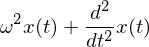

In [9]:
ode = x(t).diff(t, 2) + omega**2 * x(t)
ode

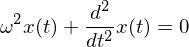

In [10]:
eq = Eq(ode)
eq

In [11]:
ode_sol = dsolve(eq)
ode_sol

Вспоминаем начальные условия: сначала t=0 груз отвели на x=L и отпустили v=0.

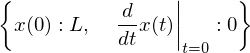

In [12]:
L = symbols("L")
ics = {x(0): L, x(t).diff(t).subs(t, 0): 0}
ics

In [13]:
lhs0 = ode_sol.lhs.subs(t,0).subs(ics)   # подставим t=0 и начальные условия x(0)=L в левую часть 
lhs0

In [14]:
rhs0 = ode_sol.rhs.subs(t,0)            # подставим t=0 в правую часть, x(0)=L не подставляем, потому что в правой части x(t) нет
rhs0

In [15]:
C2_eq = Eq(lhs0, rhs0)
C2_eq

In [16]:
C2_sol = solve(C2_eq)                     # решаем НЕ дифференциальное уравнение, поэтому solve, а не dsolve
C2_sol

Подставим в решение ode_sol 

In [17]:
res = ode_sol.subs(C2_sol[0])                 # подставим эту подстановку в полученное решение ОДУ
res

Теперь применим начальное условие, что скорость сначала равна 0.

In [18]:
v = symbols("v")
v = res.rhs.diff(t).subs({t:0})
v

In [19]:
C1_eq = Eq(v, 0)
C1_eq

In [20]:
C1_sol = solve(C1_eq)                     # решаем НЕ дифференциальное уравнение, поэтому solve, а не dsolve
C1_sol

In [21]:
res = res.rhs.subs(C1_sol[0])            # x(t) = ...        
res

Вспомним, что мы определяли $k/m$ как $\omega ^2$

In [22]:
m, k = symbols("m k", float=True, positive=True)

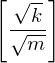

In [23]:
w0 = solve(Eq(omega**2, k/m), omega)
w0

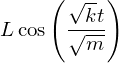

In [24]:
res0 = res.subs({omega:w0[0]})
res0

Мы получили уравнение движения x(t).
Найдем значение x через 1 секунду при заданных в задаче значениях.

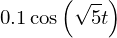

In [25]:
x = res0.subs({L:0.1, k:5, m:1})    # ответ в виде численной формулы (при любом t)
x

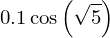

In [26]:
x.subs({t:1})                       # ответ в виде численной формулы (при t=1)

In [27]:
x.subs({t:1}).n()                       # ответ в виде ЧИСЛА (при t=1)

Построим график функции x(t). У нас он хранится в переменной x

In [28]:
from sympy.plotting import plot     # чтобы работало в notebook, если хотим отдельным окном, %matplotlib qt

%matplotlib inline   

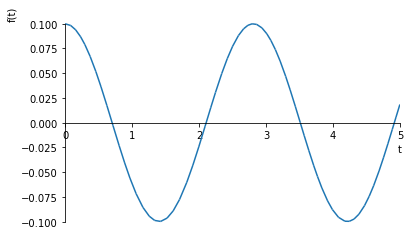

In [29]:
plot(x, (t, 0, 5))

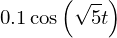

In [30]:
x